In [111]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## 🖋 Reading Datasets

> ⚠ **`CleanedMovies` Dataset**  i get it from Content-based model by saving the cleaned dataframe to csv file


In [6]:
movies = pd.read_csv("Datasets/CleanedMovies.csv")
ratings = pd.read_csv("Datasets/ratings.csv")

In [7]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


## ✅ Merging 2 Datasets 

In [10]:
df = pd.merge(movies,ratings,on="movieId",how="left")
df

,movieId,title,genres,Year,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,3.5,1.141416e+09
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.0,4.0,1.439472e+09
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,3.0,1.573944e+09
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,8.586259e+08
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8.0,4.0,8.904925e+08
...,...,...,...,...,...,...,...
25003466,209157,We,Drama,2018,119571.0,1.5,1.574281e+09
25003467,209159,Window of the Soul,Documentary,2001,115835.0,3.0,1.574281e+09
25003468,209163,Bad Poems,Comedy|Drama,2018,6964.0,4.5,1.574285e+09
25003469,209169,A Girl Thing,(no genres listed),2001,119571.0,3.0,1.574292e+09


## 👌 Taking random sample of data 

### ⚠ Small hint
> - I made it because my device cannot handle this size of dataset. 
> - If your device can, you can delete this cell
> - you will meet this issue when you making **Pivot Table** (it will use a lot of memory)


In [52]:
sample_data = df.sample(frac=0.001)

## 🟢 Making Pivot Table gor our Dataset

In [54]:
user_irem_matrix = sample_data.pivot_table(values="rating",columns="movieId",index="userId",aggfunc="mean",fill_value=0)
user_irem_matrix.head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,32,34,35,36,38,39,40,41,42,43,...,194396,194448,194947,194951,194959,195159,195165,195391,195777,196175,196417,196421,196891,196997,197119,197175,197199,197491,197711,197909,198141,198265,198295,199430,200306,200818,200820,200842,201366,201368,201586,201588,201614,201749,201833,202719,203218,204018,204044,204698
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 🟢 Get Users Similarities by **`cosine_similarity`** matrix

In [ ]:
user_similarity = cosine_similarity(user_irem_matrix,user_irem_matrix)
pd.DataFrame(user_similarity).head()


## 🛠 Build Recommended System

In [159]:
def collaborative_recommendation(userid:int,user_similarity:pd.DataFrame,user_item_matrix:pd.DataFrame,movies:pd.DataFrame):
    
    #! Get All users expect user itself
    similar_users = user_similarity[userid - 1]

    #! Arrange Users based on similaraties and return indexs
    arrange = np.argsort(similar_users)[::-1][1:6]

    #! Get movies based on top 5 Similar Users
    similar_user_ratings =  user_item_matrix.iloc[arrange].mean(axis=0)

    #! Arrange Movies and get it index
    rexommmanded_mivies_ids = similar_user_ratings.sort_values(ascending=False).head(5).index


    return movies[movies["movieId"].isin(rexommmanded_mivies_ids)]

## 🛠 Helper Function to visualise other watched movies by similar users

In [ ]:
def _Watched_films_by_other_users(userid:int,user_similarity:pd.DataFrame,movies:pd.DataFrame):

    similar_users = user_similarity[userid -1]

    arrange = np.argsort(similar_users)[::-1][1:6]

    liked_movies_ids= ratings[ratings["userId"].isin(arrange)]["movieId"]

    return movies[movies["movieId"].isin(liked_movies_ids)]

In [ ]:
def get_Most_favorite_types(user_id: int):

    favorite_Movie = _Watched_films_by_other_users(userid=user_id,user_similarity=user_similarity,movies=movies)

    favorite_Movie = pd.DataFrame(favorite_Movie)

    most = favorite_Movie["genres"].str.split("|").explode().dropna().tolist()

    sns.set_theme(style="whitegrid", context="talk", font_scale=1.1)
    plt.figure(figsize=(18, 12))
    
    ax = sns.countplot(x=most,order=pd.Series(most).value_counts().index,palette="viridis",legend=False,hue=most)

    ax.set_title(f"Top Watched Category by Similar Users to User id = {user_id}",fontsize=22,weight="bold",pad=20)

    ax.set_xlabel("Categories", fontsize=16)
    ax.set_ylabel("Category Count", fontsize=16)

    for container in ax.containers:
        ax.bar_label(container, padding=6, fontsize=13, weight="bold")

    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

## ✅ Inference

In [ ]:
user_id = 2
collaborative_recommendation(userid=user_id,user_similarity=user_similarity,user_item_matrix=user_irem_matrix,movies=movies)


,movieId,title,genres,Year
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children,1995
18,19,Ace Ventura: When Nature Calls,Comedy,1995


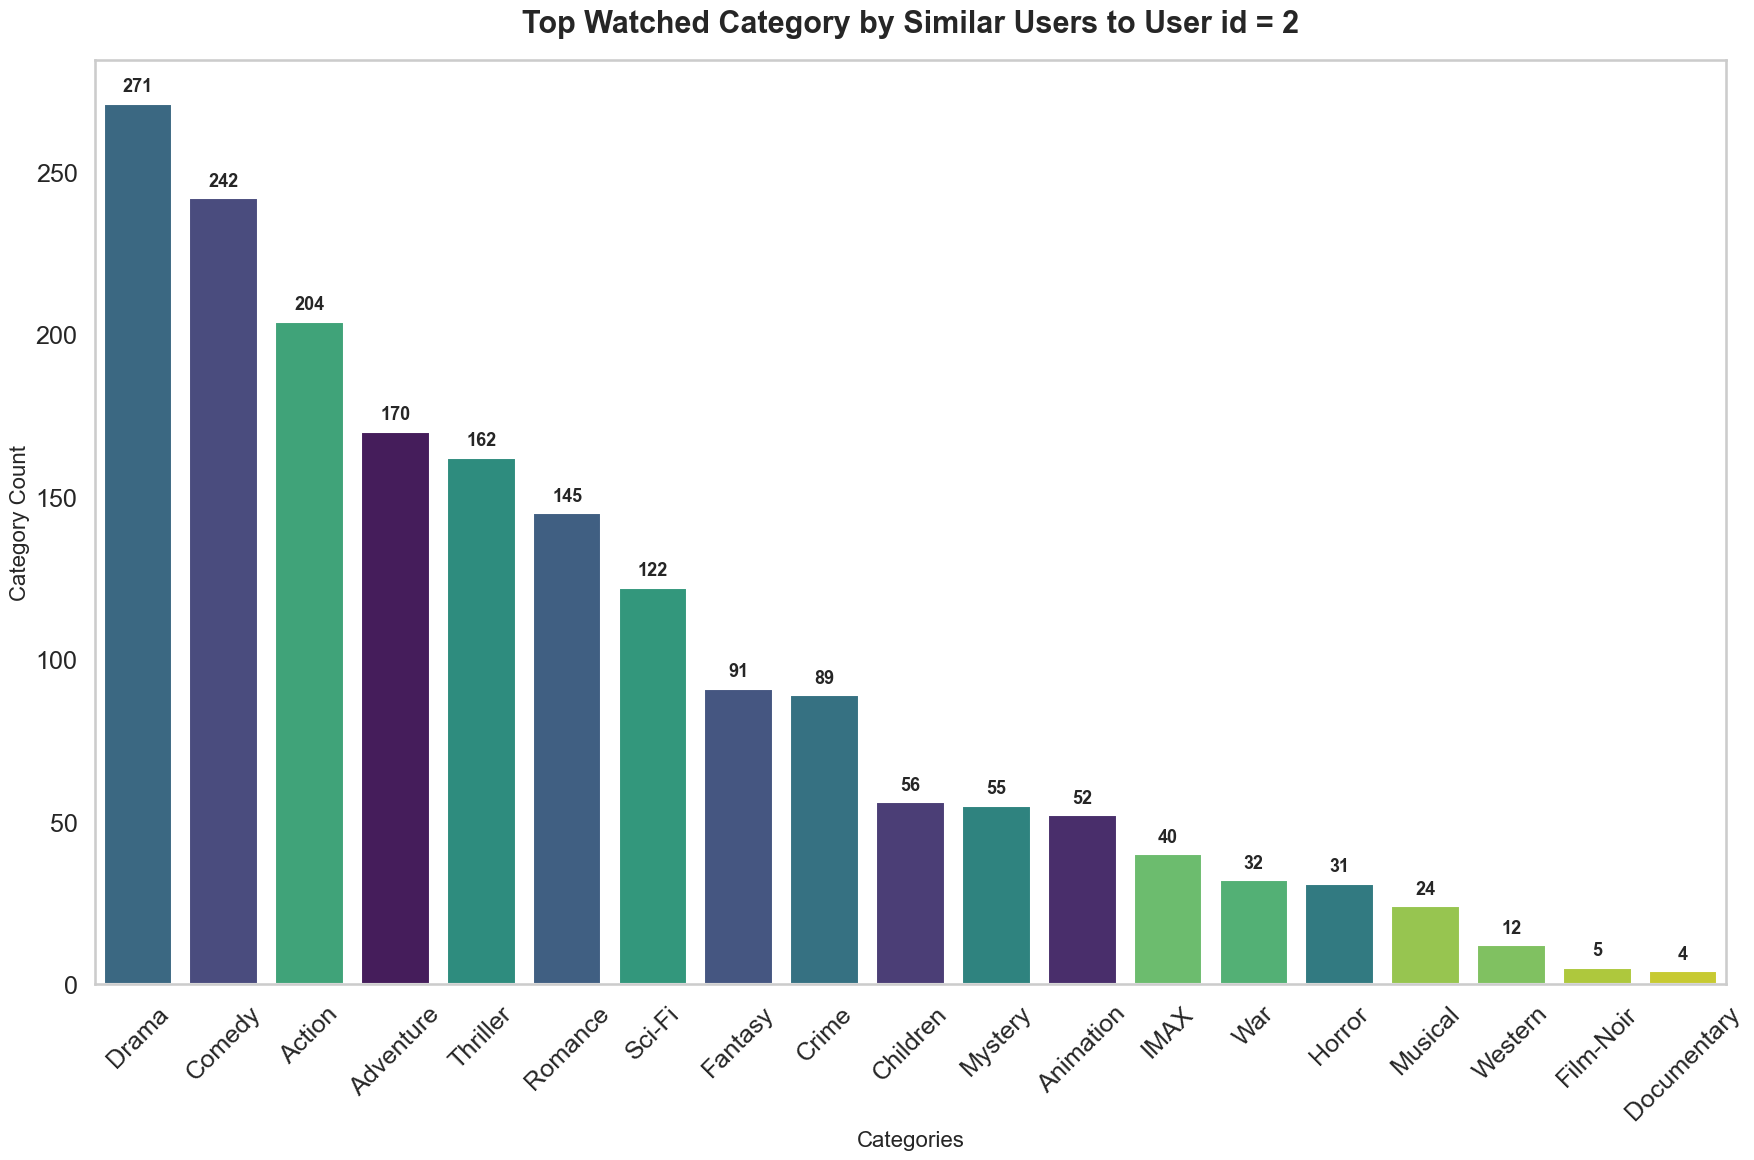

In [158]:
get_Most_favorite_types(user_id=user_id)


---

<h1 align="center">The End of model 😎</h1>


---
